In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.ensemble import IsolationForest

In [3]:
df = pd.read_excel('/Users/safwan/Desktop/445/RTA Data 2020 to July 2023.xlsx', sheet_name='Sheet1')
df.head()

,EcYear,EcNumber,CallTime,EmergencyArea,TotalPatientsInEmergency,Gender,Age,HospitalName,Reason,responsetime,...,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved
0,2020,31486,2020-12-31 22:41:47,NEAR APS SCHOOL FORT ROAD RWP,1,Male,27.0,BBH,Bike Slip,10.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020,31485,2020-12-31 22:25:00,"Infront of Daig.com, Near Dha gate 2, gt road...",1,Male,20.0,NaN,Car hit Footpath,12.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020,31483,2020-12-31 21:54:59,Muhammadi chowk arshad bakery khyaban e sirsye...,1,Male,48.0,BBH,Rickshaw hit with Car,10.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2020,31482,2020-12-31 21:24:22,"Gulzar e quaid, T/W Katcheri Near Attock Pump,...",1,Male,45.0,NaN,Car hit Car and runaway,5.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020,31479,2020-12-31 21:03:49,Taaj Company Gawalmandi Chowk Liaqat Baag Road...,1,Male,22.0,NaN,Unknown Bike hit Bike and runaway,5.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_excel('/Users/safwan/Desktop/445/RTA Data 2020 to July 2023.xlsx', sheet_name='Sheet1')

# First split: train and temporary (test + validation)
train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42)

# Second split: validation and test (from temporary set)
valid_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# Displaying the sizes of each split
print("Training set size:", train_df.shape)
print("Validation set size:", valid_df.shape)
print("Test set size:", test_df.shape)


Training set size: (32332, 25)
Validation set size: (6928, 25)
Test set size: (6929, 25)


In [7]:
# Check information for the training set
print("Training Set Info:")
train_df.info()
print("\n")

# Check information for the validation set
print("Validation Set Info:")
valid_df.info()
print("\n")

# Check information for the test set
print("Test Set Info:")
test_df.info()


Training Set Info:
<class 'pandas.core.frame.DataFrame'>
Index: 32332 entries, 9632 to 15795
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   EcYear                    32332 non-null  object        
 1   EcNumber                  27248 non-null  object        
 2   CallTime                  28171 non-null  datetime64[ns]
 3   EmergencyArea             32332 non-null  object        
 4   TotalPatientsInEmergency  32332 non-null  object        
 5   Gender                    32332 non-null  object        
 6   Age                       32332 non-null  float64       
 7   HospitalName              16962 non-null  object        
 8   Reason                    32332 non-null  object        
 9   responsetime              32329 non-null  float64       
 10  EducationTitle            32332 non-null  object        
 11  InjuryType                32331 non-null  object        
 12  C

In [10]:
# Check missing values in the training set
print("Missing values in Training Set:")
print(train_df.isnull().sum())
print("\n")

# Check missing values in the validation set
print("Missing values in Validation Set:")
print(valid_df.isnull().sum())
print("\n")

# Check missing values in the test set
print("Missing values in Test Set:")
print(test_df.isnull().sum())


Missing values in Training Set:
EcYear                          0
EcNumber                     5084
CallTime                     4161
EmergencyArea                   0
TotalPatientsInEmergency        0
Gender                          0
Age                             0
HospitalName                15370
Reason                          0
responsetime                    3
EducationTitle                  0
InjuryType                      1
Cause                           1
PatientStatus                   1
BicycleInvovled                 1
BikesInvolved                   1
BusesInvolved                   1
CarsInvolved                    1
CartInvovled                    1
RickshawsInvolved               1
TractorInvovled                 1
TrainsInvovled                  1
TrucksInvolved                  1
VansInvolved                    1
OthersInvolved                  1
dtype: int64


Missing values in Validation Set:
EcYear                         0
EcNumber                    1045
Cal

In [12]:
# Define the columns to check for missing values
columns_to_check = ['EmergencyArea', 'Gender', 'Age', 'Reason', 'responsetime', 'EducationTitle', 
                    'InjuryType', 'Cause', 'PatientStatus', 'BicycleInvovled', 'BikesInvolved', 
                    'BusesInvolved', 'CarsInvolved', 'CartInvovled', 'RickshawsInvolved', 
                    'TractorInvovled', 'TrainsInvovled', 'TrucksInvolved', 'VansInvolved', 'OthersInvolved']

# Drop rows with missing values in the specified columns for each dataset
train_df1 = train_df.dropna(subset=columns_to_check)
valid_df1 = valid_df.dropna(subset=columns_to_check)
test_df1 = test_df.dropna(subset=columns_to_check)

# Check the resulting sizes
print("Training set size after dropping missing values:", train_df1.shape)
print("Validation set size after dropping missing values:", valid_df1.shape)
print("Test set size after dropping missing values:", test_df1.shape)


Training set size after dropping missing values: (32328, 25)
Validation set size after dropping missing values: (6927, 25)
Test set size after dropping missing values: (6927, 25)


In [14]:
# Check missing values in the training set
print("Missing values in Training Set:")
print(train_df1.isnull().sum())
print("\n")

# Check missing values in the validation set
print("Missing values in Validation Set:")
print(valid_df1.isnull().sum())
print("\n")

# Check missing values in the test set
print("Missing values in Test Set:")
print(test_df1.isnull().sum())


Missing values in Training Set:
EcYear                          0
EcNumber                     5084
CallTime                     4160
EmergencyArea                   0
TotalPatientsInEmergency        0
Gender                          0
Age                             0
HospitalName                15369
Reason                          0
responsetime                    0
EducationTitle                  0
InjuryType                      0
Cause                           0
PatientStatus                   0
BicycleInvovled                 0
BikesInvolved                   0
BusesInvolved                   0
CarsInvolved                    0
CartInvovled                    0
RickshawsInvolved               0
TractorInvovled                 0
TrainsInvovled                  0
TrucksInvolved                  0
VansInvolved                    0
OthersInvolved                  0
dtype: int64


Missing values in Validation Set:
EcYear                         0
EcNumber                    1045
Cal

In [16]:
# Function to process each DataFrame
def process_call_time(df):
    # Convert 'CallTime' to datetime
    df['CallTime'] = pd.to_datetime(df['CallTime'], errors='coerce')
    
    # Create new columns
    df['Time'] = df['CallTime'].dt.time  # Extract time
    df['Day'] = df['CallTime'].dt.day_name()  # Extract day name
    df['Month'] = df['CallTime'].dt.month_name()  # Extract month name
    
    return df

# Process each DataFrame
train_df1 = process_call_time(train_df1)
valid_df1 = process_call_time(valid_df1)
test_df1 = process_call_time(test_df1)

# Display the updated DataFrame with new columns for each set
print("Training Set:")
print(train_df1[['Time', 'Day', 'Month']].head(), "\n")

print("Validation Set:")
print(valid_df1[['Time', 'Day', 'Month']].head(), "\n")

print("Test Set:")
print(test_df1[['Time', 'Day', 'Month']].head())


Training Set:
           Time       Day      Month
9632        NaT       NaN        NaN
1721        NaT       NaN        NaN
3305   19:56:10  Saturday  September
32702  13:08:00  Saturday        May
30845  14:34:00    Monday       July 

Validation Set:
           Time       Day    Month
18056  17:14:00  Thursday      May
5853        NaT       NaN      NaN
38670       NaT       NaN      NaN
8713   14:20:36    Friday  January
10927  13:43:39    Friday  January 

Test Set:
           Time        Day      Month
3028   08:14:45    Tuesday  September
31872  09:49:00    Tuesday        May
7478   00:11:00     Sunday      March
8777   09:04:29  Wednesday    January
26430  22:59:00     Monday   November


/var/folders/2z/xtk4qmhn2_q354lrvyct99600000gn/T/ipykernel_18135/3498452787.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CallTime'] = pd.to_datetime(df['CallTime'], errors='coerce')
/var/folders/2z/xtk4qmhn2_q354lrvyct99600000gn/T/ipykernel_18135/3498452787.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time'] = df['CallTime'].dt.time  # Extract time
/var/folders/2z/xtk4qmhn2_q354lrvyct99600000gn/T/ipykernel_18135/3498452787.py:8: SettingWithCopyWarning: 
A value is trying to be set on a

In [18]:
# Function to convert time to seconds
def time_to_seconds(time_obj):
    if pd.isna(time_obj):
        return None
    return time_obj.hour * 3600 + time_obj.minute * 60 + time_obj.second

# Function to process each DataFrame and add Time_in_seconds
def process_time_in_seconds(df):
    # Create a new column for time in seconds
    df['Time_in_seconds'] = df['Time'].apply(time_to_seconds)
    
    # Fill missing values with the mean of the previous and next values
    df['Time_in_seconds'] = df['Time_in_seconds'].fillna(
        (df['Time_in_seconds'].shift(1) + df['Time_in_seconds'].shift(-1)) / 2
    )
    
    return df

# Process each DataFrame
train_df1 = process_time_in_seconds(train_df1)
valid_df1 = process_time_in_seconds(valid_df1)
test_df1 = process_time_in_seconds(test_df1)

# Display the updated DataFrame with the new 'Time_in_seconds' column for each set
print("Training Set with Time in Seconds:")
print(train_df1[['Time', 'Time_in_seconds']].head(), "\n")

print("Validation Set with Time in Seconds:")
print(valid_df1[['Time', 'Time_in_seconds']].head(), "\n")

print("Test Set with Time in Seconds:")
print(test_df1[['Time', 'Time_in_seconds']].head())


Training Set with Time in Seconds:
           Time  Time_in_seconds
9632        NaT              NaN
1721        NaT              NaN
3305   19:56:10          71770.0
32702  13:08:00          47280.0
30845  14:34:00          52440.0 

Validation Set with Time in Seconds:
           Time  Time_in_seconds
18056  17:14:00          62040.0
5853        NaT              NaN
38670       NaT              NaN
8713   14:20:36          51636.0
10927  13:43:39          49419.0 

Test Set with Time in Seconds:
           Time  Time_in_seconds
3028   08:14:45          29685.0
31872  09:49:00          35340.0
7478   00:11:00            660.0
8777   09:04:29          32669.0
26430  22:59:00          82740.0


/var/folders/2z/xtk4qmhn2_q354lrvyct99600000gn/T/ipykernel_18135/3192208316.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time_in_seconds'] = df['Time'].apply(time_to_seconds)
/var/folders/2z/xtk4qmhn2_q354lrvyct99600000gn/T/ipykernel_18135/3192208316.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time_in_seconds'] = df['Time_in_seconds'].fillna(
/var/folders/2z/xtk4qmhn2_q354lrvyct99600000gn/T/ipykernel_18135/3192208316.py:10: SettingWithCopyWarning: 
A value is trying to be set on a c

In [20]:
# Function to convert seconds back to time format
def seconds_to_time(seconds):
    if pd.isna(seconds):
        return None
    h = int(seconds // 3600)
    m = int((seconds % 3600) // 60)
    s = int(seconds % 60)
    return f"{h:02}:{m:02}:{s:02}"

# Function to process each DataFrame
def process_time_conversion(df):
    # Backward fill missing values
    df['Time_in_seconds'] = df['Time_in_seconds'].fillna(method='bfill')
    
    # Forward fill missing values
    df['Time_in_seconds'] = df['Time_in_seconds'].fillna(method='ffill')
    
    # Create a new column for the time format
    df['TIME'] = df['Time_in_seconds'].apply(seconds_to_time)
    
    return df

# Process each DataFrame
train_df1 = process_time_conversion(train_df1)
valid_df1 = process_time_conversion(valid_df1)
test_df1 = process_time_conversion(test_df1)

# Display the updated DataFrame with the new 'TIME' column for each set
print("Training Set with TIME:")
print(train_df1[['Time_in_seconds', 'TIME']].head(), "\n")

print("Validation Set with TIME:")
print(valid_df1[['Time_in_seconds', 'TIME']].head(), "\n")

print("Test Set with TIME:")
print(test_df1[['Time_in_seconds', 'TIME']].head())


Training Set with TIME:
       Time_in_seconds      TIME
9632           71770.0  19:56:10
1721           71770.0  19:56:10
3305           71770.0  19:56:10
32702          47280.0  13:08:00
30845          52440.0  14:34:00 

Validation Set with TIME:
       Time_in_seconds      TIME
18056          62040.0  17:14:00
5853           51636.0  14:20:36
38670          51636.0  14:20:36
8713           51636.0  14:20:36
10927          49419.0  13:43:39 

Test Set with TIME:
       Time_in_seconds      TIME
3028           29685.0  08:14:45
31872          35340.0  09:49:00
7478             660.0  00:11:00
8777           32669.0  09:04:29
26430          82740.0  22:59:00


/var/folders/2z/xtk4qmhn2_q354lrvyct99600000gn/T/ipykernel_18135/3107983667.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Time_in_seconds'] = df['Time_in_seconds'].fillna(method='bfill')
/var/folders/2z/xtk4qmhn2_q354lrvyct99600000gn/T/ipykernel_18135/3107983667.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time_in_seconds'] = df['Time_in_seconds'].fillna(method='bfill')
/var/folders/2z/xtk4qmhn2_q354lrvyct99600000gn/T/ipykernel_18135/3107983667.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Time_in_seconds'] = df['Time_in_seconds'].fillna(

In [22]:
# Drop specified columns from each DataFrame
columns_to_drop = ['CallTime', 'Time_in_seconds', 'Time']

train_df1.drop(columns=columns_to_drop, inplace=True)
valid_df1.drop(columns=columns_to_drop, inplace=True)
test_df1.drop(columns=columns_to_drop, inplace=True)

# Display the updated DataFrames to confirm columns have been dropped
print("Training Set after dropping columns:")
print(train_df1.head(), "\n")

print("Validation Set after dropping columns:")
print(valid_df1.head(), "\n")

print("Test Set after dropping columns:")
print(test_df1.head())


Training Set after dropping columns:
      EcYear EcNumber                                      EmergencyArea  \
9632    2020      NaN           Sanjani Toll Plaza, Near Fecto Pump, Isb   
1721    2020      NaN  Near AL-qamer Flour mill  Railway workshop roa...   
3305    2020    21036  Near go pump,medical college fouji tower,rawal...   
32702   2022   323257        Janjua Town, Jarahi Stop, Adyala Road, Rwp.   
30845   2022   330785              imtiaz mall G t road n/r pso pump rwp   

      TotalPatientsInEmergency  Gender   Age           HospitalName  \
9632                         2    Male  22.0  HIT Wah Cantt, Taxila   
1721                         4    Male  33.0                    DHQ   
3305                         1  Female  60.0                    NaN   
32702                        1    Male   8.0                    NaN   
30845                        1    Male  32.0                    BBH   

                                               Reason  responsetime  \
9632    

/var/folders/2z/xtk4qmhn2_q354lrvyct99600000gn/T/ipykernel_18135/2762708384.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df1.drop(columns=columns_to_drop, inplace=True)
/var/folders/2z/xtk4qmhn2_q354lrvyct99600000gn/T/ipykernel_18135/2762708384.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df1.drop(columns=columns_to_drop, inplace=True)
/var/folders/2z/xtk4qmhn2_q354lrvyct99600000gn/T/ipykernel_18135/2762708384.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [24]:
# Generate summary statistics for each DataFrame
train_summary = train_df1.describe()
valid_summary = valid_df1.describe()
test_summary = test_df1.describe()

# Print the summary statistics
print("Summary Statistics for Training Set:")
print(train_summary, "\n")

print("Summary Statistics for Validation Set:")
print(valid_summary, "\n")

print("Summary Statistics for Test Set:")
print(test_summary)


Summary Statistics for Training Set:
                Age  responsetime  BicycleInvovled  BikesInvolved  \
count  32328.000000  32328.000000     32328.000000   32328.000000   
mean      32.437794      6.253870         0.008909       0.966592   
std       15.177508      4.929714         0.094295       0.579229   
min        0.000000      1.000000         0.000000       0.000000   
25%       21.000000      3.000000         0.000000       1.000000   
50%       29.000000      5.000000         0.000000       1.000000   
75%       42.000000      8.000000         0.000000       1.000000   
max      118.000000    101.000000         2.000000      10.000000   

       BusesInvolved  CarsInvolved  CartInvovled  RickshawsInvolved  \
count   32328.000000  32328.000000  32328.000000       32328.000000   
mean        0.009435      0.233884      0.002134           0.087478   
std         0.101969      0.447946      0.046151           0.289248   
min         0.000000      0.000000      0.000000         

In [26]:
import numpy as np
from scipy import stats

# Function to identify outliers using Z-score
def identify_outliers(df):
    # Calculate Z-scores
    z_scores = np.abs(stats.zscore(df[['Age', 'responsetime', 'BikesInvolved']].dropna()))
    
    # Identify rows with outliers
    outliers = np.where(z_scores > 3)
    outliers_indices = np.unique(outliers[0])  # Unique indices of outliers
    
    return outliers_indices

# Identify outliers in each DataFrame
train_outliers = identify_outliers(train_df1)
valid_outliers = identify_outliers(valid_df1)
test_outliers = identify_outliers(test_df1)

# Print outliers indices for each dataset
print("Outliers detected at rows in Training Set:", train_outliers)
print("Outliers detected at rows in Validation Set:", valid_outliers)
print("Outliers detected at rows in Test Set:", test_outliers)


Outliers detected at rows in Training Set: [   39   107   204   316   503   559   612   622   625   699   771   775
   778   789   799   807   816   825   881   895   909   929   963  1034
  1240  1462  1609  1656  1734  1786  1820  1828  1831  1946  1976  2027
  2087  2211  2360  2363  2413  2494  2509  2529  2610  2632  2681  2799
  2864  2985  3088  3106  3107  3138  3142  3210  3290  3311  3467  3470
  3624  3631  3684  3758  3764  3769  3811  3896  3946  4015  4054  4068
  4075  4134  4216  4377  4525  4548  4598  4622  4720  4799  4830  4937
  4975  4980  5030  5145  5269  5322  5386  5391  5448  5455  5547  5552
  5598  5711  5726  5791  5802  5821  5858  5969  6094  6134  6150  6167
  6180  6188  6220  6244  6270  6317  6361  6433  6468  6491  6519  6568
  6588  6630  6731  6741  6812  6819  6827  6956  7057  7105  7124  7199
  7267  7413  7646  7724  7742  7786  7832  7857  7879  7908  7955  7998
  8061  8216  8235  8326  8398  8524  8636  8736  8741  8781  8784  8849
  8856  

In [28]:
# Function to identify outliers using IQR
def identify_outliers_iqr(df):
    # Calculate Q1 and Q3
    Q1 = df[['Age', 'responsetime']].quantile(0.25)
    Q3 = df[['Age', 'responsetime']].quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers
    outliers = ((df[['Age', 'responsetime']] < (Q1 - 1.5 * IQR)) | 
                 (df[['Age', 'responsetime']] > (Q3 + 1.5 * IQR)))
    outliers_df = df[outliers.any(axis=1)]

    return outliers_df

# Identify outliers in each DataFrame
train_outliers_iqr = identify_outliers_iqr(train_df1)
valid_outliers_iqr = identify_outliers_iqr(valid_df1)
test_outliers_iqr = identify_outliers_iqr(test_df1)

# Print outliers count and display first few rows for each dataset
print("Outliers detected using IQR in Training Set:", train_outliers_iqr.shape[0])
print(train_outliers_iqr.head(), "\n")

print("Outliers detected using IQR in Validation Set:", valid_outliers_iqr.shape[0])
print(valid_outliers_iqr.head(), "\n")

print("Outliers detected using IQR in Test Set:", test_outliers_iqr.shape[0])
print(test_outliers_iqr.head())


Outliers detected using IQR in Training Set: 1877
      EcYear EcNumber                                      EmergencyArea  \
45245   2023   360763             pehawar road lane no 05 t.w saddar rwp   
43398   2023   367749   Pakistan State Oil, Airport Road, Chaklala Sc...   
18432   2021    12331  Infront Of Punjab Housing Society Gate Adyala ...   
38293   2023      NaN   Pwd Housing Society, Islamabad Capital Territory   
38546   2023   384886         Rhc Baga Sheikhan Chakbeli Road Rawalpindi   

      TotalPatientsInEmergency  Gender   Age                 HospitalName  \
45245                        1  Female  76.0                          NaN   
43398                        1    Male  27.0                          NaN   
18432                        1  Female  23.0                          BBH   
38293                        2    Male  48.0                         PIMS   
38546                        1    Male  36.0  Wateen Hospital, Rawalpindi   

                              

In [30]:
from sklearn.ensemble import IsolationForest

# Function to apply Isolation Forest and identify outliers
def identify_outliers_isolation_forest(df):
    # Drop missing values from specified columns
    df_clean = df[['Age', 'responsetime']].dropna()
    
    # Apply Isolation Forest
    iso_forest = IsolationForest(contamination=0.05, random_state=42)
    df_clean['Outlier'] = iso_forest.fit_predict(df_clean)
    
    # -1 indicates outliers
    outliers_iso = df_clean[df_clean['Outlier'] == -1]
    
    return outliers_iso

# Identify outliers in each DataFrame
train_outliers_iso = identify_outliers_isolation_forest(train_df1)
valid_outliers_iso = identify_outliers_isolation_forest(valid_df1)
test_outliers_iso = identify_outliers_isolation_forest(test_df1)

# Print outliers count and display first few rows for each dataset
print("Outliers detected using Isolation Forest in Training Set:", train_outliers_iso.shape[0])
print(train_outliers_iso.head(), "\n")

print("Outliers detected using Isolation Forest in Validation Set:", valid_outliers_iso.shape[0])
print(valid_outliers_iso.head(), "\n")

print("Outliers detected using Isolation Forest in Test Set:", test_outliers_iso.shape[0])
print(test_outliers_iso.head())


Outliers detected using Isolation Forest in Training Set: 1617
        Age  responsetime  Outlier
45245  76.0           3.0       -1
8285    3.0          10.0       -1
26335   4.0           2.0       -1
43398  27.0          82.0       -1
38293  48.0          20.0       -1 

Outliers detected using Isolation Forest in Validation Set: 347
        Age  responsetime  Outlier
41417  15.0          22.0       -1
10743  43.0          20.0       -1
26713  70.0          29.0       -1
39271  34.0          22.0       -1
8867    5.0           2.0       -1 

Outliers detected using Isolation Forest in Test Set: 346
        Age  responsetime  Outlier
43334  75.0           3.0       -1
9588   63.0          23.0       -1
22311  52.0          16.0       -1
42100  53.0          18.0       -1
15168  17.0          26.0       -1


In [31]:
# Function to remove outliers based on IQR method
def remove_outliers_iqr(df):
    # Calculate Q1 and Q3
    Q1 = df[['Age', 'responsetime']].quantile(0.25)
    Q3 = df[['Age', 'responsetime']].quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers
    outliers = ((df[['Age', 'responsetime']] < (Q1 - 1.5 * IQR)) | 
                 (df[['Age', 'responsetime']] > (Q3 + 1.5 * IQR)))

    # Remove outliers
    cleaned_df = df[~outliers.any(axis=1)]
    return cleaned_df

# Remove outliers in each DataFrame
cleaned_train_df = remove_outliers_iqr(train_df1)
cleaned_valid_df = remove_outliers_iqr(valid_df1)
cleaned_test_df = remove_outliers_iqr(test_df1)

# Print the shape of cleaned DataFrames
print("Data shape after removing outliers in Training Set:", cleaned_train_df.shape)
print("Data shape after removing outliers in Validation Set:", cleaned_valid_df.shape)
print("Data shape after removing outliers in Test Set:", cleaned_test_df.shape)


Data shape after removing outliers in Training Set: (30451, 27)
Data shape after removing outliers in Validation Set: (6518, 27)
Data shape after removing outliers in Test Set: (6483, 27)


In [34]:
# Function to detect outliers in 'BikesInvolved' using the IQR method
def detect_outliers_iqr_bikes(df):
    # Calculate Q1 and Q3
    Q1 = df['BikesInvolved'].quantile(0.25)
    Q3 = df['BikesInvolved'].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df['BikesInvolved'] < lower_bound) | (df['BikesInvolved'] > upper_bound)]

    return outliers

# Detect outliers in each cleaned DataFrame
train_outliers_bikes = detect_outliers_iqr_bikes(cleaned_train_df)
valid_outliers_bikes = detect_outliers_iqr_bikes(cleaned_valid_df)
test_outliers_bikes = detect_outliers_iqr_bikes(cleaned_test_df)

# Print outliers count for each dataset
print("Outliers detected using IQR in Training Set for 'BikesInvolved':", train_outliers_bikes.shape[0])
print(train_outliers_bikes.head(), "\n")

print("Outliers detected using IQR in Validation Set for 'BikesInvolved':", valid_outliers_bikes.shape[0])
print(valid_outliers_bikes.head(), "\n")

print("Outliers detected using IQR in Test Set for 'BikesInvolved':", test_outliers_bikes.shape[0])
print(test_outliers_bikes.head())


Outliers detected using IQR in Training Set for 'BikesInvolved': 9915
      EcYear EcNumber                                      EmergencyArea  \
9632    2020      NaN           Sanjani Toll Plaza, Near Fecto Pump, Isb   
1721    2020      NaN  Near AL-qamer Flour mill  Railway workshop roa...   
3305    2020    21036  Near go pump,medical college fouji tower,rawal...   
32702   2022   323257        Janjua Town, Jarahi Stop, Adyala Road, Rwp.   
24776   2022   354261             Matuha Village,Bhadana Road,Gujar Khan   

      TotalPatientsInEmergency  Gender   Age                HospitalName  \
9632                         2    Male  22.0       HIT Wah Cantt, Taxila   
1721                         4    Male  33.0                         DHQ   
3305                         1  Female  60.0                         NaN   
32702                        1    Male   8.0                         NaN   
24776                        3    Male  30.0  THQ,Gujar Khan, Rawalpindi   

                

In [36]:
# Function to handle outliers in 'BikesInvolved' using the IQR method
def handle_outliers_bikes(df):
    # Calculate Q1 and Q3
    Q1 = df['BikesInvolved'].quantile(0.25)
    Q3 = df['BikesInvolved'].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Clip values outside the bounds
    df['BikesInvolved'] = df['BikesInvolved'].clip(lower=lower_bound, upper=upper_bound)

    # Calculate median
    median_value = df['BikesInvolved'].median()

    # Replace remaining outliers with median
    df.loc[(df['BikesInvolved'] < lower_bound) | (df['BikesInvolved'] > upper_bound), 'BikesInvolved'] = median_value

    return df

# Handle outliers in each cleaned DataFrame
cleaned_train_df = handle_outliers_bikes(cleaned_train_df)
cleaned_valid_df = handle_outliers_bikes(cleaned_valid_df)
cleaned_test_df = handle_outliers_bikes(cleaned_test_df)

# Print the first few rows of each DataFrame after handling outliers
print("Training Set after handling outliers in 'BikesInvolved':")
print(cleaned_train_df[['BikesInvolved']].head(), "\n")

print("Validation Set after handling outliers in 'BikesInvolved':")
print(cleaned_valid_df[['BikesInvolved']].head(), "\n")

print("Test Set after handling outliers in 'BikesInvolved':")
print(cleaned_test_df[['BikesInvolved']].head())


Training Set after handling outliers in 'BikesInvolved':
       BikesInvolved
9632             1.0
1721             1.0
3305             1.0
32702            1.0
30845            1.0 

Validation Set after handling outliers in 'BikesInvolved':
       BikesInvolved
18056            1.0
5853             1.0
38670            1.0
8713             1.0
10927            1.0 

Test Set after handling outliers in 'BikesInvolved':
       BikesInvolved
3028             1.0
31872            1.0
7478             1.0
8777             1.0
26430            1.0


/var/folders/2z/xtk4qmhn2_q354lrvyct99600000gn/T/ipykernel_18135/1118517347.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BikesInvolved'] = df['BikesInvolved'].clip(lower=lower_bound, upper=upper_bound)
/var/folders/2z/xtk4qmhn2_q354lrvyct99600000gn/T/ipykernel_18135/1118517347.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BikesInvolved'] = df['BikesInvolved'].clip(lower=lower_bound, upper=upper_bound)
/var/folders/2z/xtk4qmhn2_q354lrvyct99600000gn/T/ipykernel_18135/1118517347.py:13: S

In [38]:
# Function to count unique values for specified columns
def count_unique_values(df):
    unique_counts = df[['Gender', 'Age', 
                        'EducationTitle', 
                        'InjuryType', 'Cause', 'PatientStatus', 
                        'Day', 'Month']].nunique()
    return unique_counts

# Count unique values for each cleaned DataFrame
unique_counts_train = count_unique_values(cleaned_train_df)
unique_counts_valid = count_unique_values(cleaned_valid_df)
unique_counts_test = count_unique_values(cleaned_test_df)

# Print unique counts for each dataset
print("Unique counts in the Training Set:")
print(unique_counts_train, "\n")

print("Unique counts in the Validation Set:")
print(unique_counts_valid, "\n")

print("Unique counts in the Test Set:")
print(unique_counts_test)


Unique counts in the Training Set:
Gender             3
Age               74
EducationTitle     8
InjuryType         5
Cause              7
PatientStatus      3
Day                7
Month             12
dtype: int64 

Unique counts in the Validation Set:
Gender             2
Age               73
EducationTitle     7
InjuryType         5
Cause              7
PatientStatus      3
Day                7
Month             12
dtype: int64 

Unique counts in the Test Set:
Gender             2
Age               72
EducationTitle     8
InjuryType         5
Cause              7
PatientStatus      3
Day                7
Month             12
dtype: int64


In [40]:
# Function to one-hot encode specified categorical columns
def one_hot_encode(df):
    categorical_columns = ['Gender',  'Cause',  'EducationTitle', 'Day', 'Month']
    encoded_df = pd.get_dummies(df, columns=categorical_columns, drop_first=False)
    return encoded_df

# One-hot encode each cleaned DataFrame
encoded_train_df = one_hot_encode(cleaned_train_df)
encoded_valid_df = one_hot_encode(cleaned_valid_df)
encoded_test_df = one_hot_encode(cleaned_test_df)

# Print the encoded DataFrames
print("Encoded Training Set:")
print(encoded_train_df.head(), "\n")

print("Encoded Validation Set:")
print(encoded_valid_df.head(), "\n")

print("Encoded Test Set:")
print(encoded_test_df.head())


Encoded Training Set:
      EcYear EcNumber                                      EmergencyArea  \
9632    2020      NaN           Sanjani Toll Plaza, Near Fecto Pump, Isb   
1721    2020      NaN  Near AL-qamer Flour mill  Railway workshop roa...   
3305    2020    21036  Near go pump,medical college fouji tower,rawal...   
32702   2022   323257        Janjua Town, Jarahi Stop, Adyala Road, Rwp.   
30845   2022   330785              imtiaz mall G t road n/r pso pump rwp   

      TotalPatientsInEmergency   Age           HospitalName  \
9632                         2  22.0  HIT Wah Cantt, Taxila   
1721                         4  33.0                    DHQ   
3305                         1  60.0                    NaN   
32702                        1   8.0                    NaN   
30845                        1  32.0                    BBH   

                                               Reason  responsetime  \
9632                            Vehicle fall in Ditch           1.0   


In [42]:

# Function to describe DataFrame
def describe_dataframe(df):
    return df.describe()

# Describe each encoded DataFrame
description_train = describe_dataframe(encoded_train_df)
description_valid = describe_dataframe(encoded_valid_df)
description_test = describe_dataframe(encoded_test_df)

# Print descriptions for each dataset
print("Descriptive Statistics for Encoded Training Set:")
print(description_train, "\n")

print("Descriptive Statistics for Encoded Validation Set:")
print(description_valid, "\n")

print("Descriptive Statistics for Encoded Test Set:")
print(description_test)


Descriptive Statistics for Encoded Training Set:
                Age  responsetime  BicycleInvovled  BikesInvolved  \
count  30451.000000  30451.000000     30451.000000        30451.0   
mean      31.972185      5.487836         0.008965            1.0   
std       14.490977      3.181341         0.094609            0.0   
min        0.000000      1.000000         0.000000            1.0   
25%       21.000000      3.000000         0.000000            1.0   
50%       29.000000      5.000000         0.000000            1.0   
75%       41.000000      7.000000         0.000000            1.0   
max       73.000000     15.000000         2.000000            1.0   

       BusesInvolved  CarsInvolved  CartInvovled  RickshawsInvolved  \
count   30451.000000  30451.000000  30451.000000       30451.000000   
mean        0.008834      0.234869      0.002167           0.087912   
std         0.098365      0.448688      0.046506           0.290046   
min         0.000000      0.000000      0.000

In [44]:
from sklearn.preprocessing import StandardScaler

# Columns to standardize
columns_to_standardize = ['Age', 'TotalPatientsInEmergency', 'responsetime']

# Function to standardize selected columns in a DataFrame
def standardize_columns(df, columns):
    scaler = StandardScaler()
    df[columns] = scaler.fit_transform(df[columns])
    return df

# Standardize each encoded DataFrame
standardized_train_df = standardize_columns(encoded_train_df, columns_to_standardize)
standardized_valid_df = standardize_columns(encoded_valid_df, columns_to_standardize)
standardized_test_df = standardize_columns(encoded_test_df, columns_to_standardize)

# Print the descriptive statistics for the standardized columns in each dataset
print("Descriptive Statistics for Standardized Training Set:")
print(standardized_train_df[columns_to_standardize].describe(), "\n")

print("Descriptive Statistics for Standardized Validation Set:")
print(standardized_valid_df[columns_to_standardize].describe(), "\n")

print("Descriptive Statistics for Standardized Test Set:")
print(standardized_test_df[columns_to_standardize].describe())


Descriptive Statistics for Standardized Training Set:
                Age  TotalPatientsInEmergency  responsetime
count  3.045100e+04              3.045100e+04  3.045100e+04
mean  -2.403399e-17              1.120031e-16 -7.151862e-17
std    1.000016e+00              1.000016e+00  1.000016e+00
min   -2.206387e+00             -3.732634e-01 -1.410697e+00
25%   -7.571860e-01             -3.732634e-01 -7.820215e-01
50%   -2.051093e-01             -3.732634e-01 -1.533455e-01
75%    6.230058e-01             -3.732634e-01  4.753306e-01
max    2.831313e+00              1.582126e+01  2.990035e+00 

Descriptive Statistics for Standardized Validation Set:
                Age  TotalPatientsInEmergency  responsetime
count  6.518000e+03              6.518000e+03  6.518000e+03
mean  -2.234754e-16              1.417161e-17 -1.934970e-17
std    1.000077e+00              1.000077e+00  1.000077e+00
min   -2.123595e+00             -3.569339e-01 -1.407947e+00
25%   -7.574282e-01             -3.569339e-01 -7

In [46]:

print(standardized_test_df.columns)


Index(['EcYear', 'EcNumber', 'EmergencyArea', 'TotalPatientsInEmergency',
       'Age', 'HospitalName', 'Reason', 'responsetime', 'InjuryType',
       'PatientStatus', 'BicycleInvovled', 'BikesInvolved', 'BusesInvolved',
       'CarsInvolved', 'CartInvovled', 'RickshawsInvolved', 'TractorInvovled',
       'TrainsInvovled', 'TrucksInvolved', 'VansInvolved', 'OthersInvolved',
       'TIME', 'Gender_Female', 'Gender_Male', 'Cause_Carelessness',
       'Cause_One Wheeling', 'Cause_Others', 'Cause_Over Speed',
       'Cause_Tyre Burst', 'Cause_U Turn', 'Cause_Wrong Turn',
       'EducationTitle_Graduation', 'EducationTitle_Illetrate',
       'EducationTitle_Intermediate', 'EducationTitle_Masters',
       'EducationTitle_Matric', 'EducationTitle_Middle', 'EducationTitle_PHD',
       'EducationTitle_Primary', 'Day_Friday', 'Day_Monday', 'Day_Saturday',
       'Day_Sunday', 'Day_Thursday', 'Day_Tuesday', 'Day_Wednesday',
       'Month_April', 'Month_August', 'Month_December', 'Month_February',

In [54]:
print(standardized_train_df.isnull().sum())
print(standardized_valid_df.isnull().sum())
print(standardized_test_df.isnull().sum())

EcYear                             0
EcNumber                        4591
EmergencyArea                      0
TotalPatientsInEmergency           0
Age                                0
HospitalName                   14930
Reason                             0
responsetime                       0
InjuryType                         0
PatientStatus                      0
BicycleInvovled                    0
BikesInvolved                      0
BusesInvolved                      0
CarsInvolved                       0
CartInvovled                       0
RickshawsInvolved                  0
TractorInvovled                    0
TrainsInvovled                     0
TrucksInvolved                     0
VansInvolved                       0
OthersInvolved                     0
TIME                               0
Gender_Female                      0
Gender_Male                        0
Gender_Other                       0
Cause_Carelessness                 0
Cause_One Wheeling                 0
C

In [56]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the feature set and target variable
features = [
    'Age', 'responsetime', 'TotalPatientsInEmergency',
    'Gender_Female', 'Gender_Male', 
    'Cause_Carelessness', 'Cause_One Wheeling', 'Cause_Others',
    'Cause_Over Speed', 'Cause_Tyre Burst', 'Cause_U Turn', 'Cause_Wrong Turn',
    'BusesInvolved', 'CarsInvolved', 'RickshawsInvolved',
    'BicycleInvovled', 'VansInvolved', 'BikesInvolved'
]

target = 'InjuryType'

# Separate features and target variable for training and validation sets
X_train = standardized_train_df[features]
y_train = standardized_train_df[target]

X_val = standardized_valid_df[features]
y_val = standardized_valid_df[target]

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = log_reg.predict(X_val)

# Evaluate the accuracy on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f"Validation Accuracy: {val_accuracy:.4f}")


Validation Accuracy: 0.7625


Accuracy on Test Set: 0.7652

Confusion Matrix:
[[   3  434    0    0    0]
 [   4 4958    0    0    0]
 [   1  110    0    0    0]
 [   0  912    0    0    0]
 [   0   61    0    0    0]]

Precision on Test Set: 0.6113
Recall on Test Set: 0.7652
F1 Score on Test Set: 0.6645


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


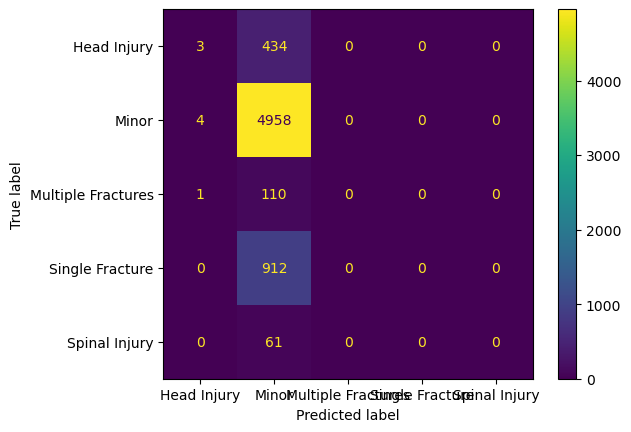

In [60]:
from sklearn.metrics import (
    accuracy_score, confusion_matrix, precision_score,
    recall_score, f1_score, ConfusionMatrixDisplay
)

# Separate features and target variable for the test set
X_test = standardized_test_df[features]
y_test = standardized_test_df[target]

# Make predictions on the test set
y_test_pred = log_reg.predict(X_test)

# a. Accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy on Test Set: {test_accuracy:.4f}")

# b. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)

# c. Precision
test_precision = precision_score(y_test, y_test_pred, average='weighted')
print(f"\nPrecision on Test Set: {test_precision:.4f}")

# d. Recall
test_recall = recall_score(y_test, y_test_pred, average='weighted')
print(f"Recall on Test Set: {test_recall:.4f}")

# e. F1 Score
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
print(f"F1 Score on Test Set: {test_f1:.4f}")


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached whic

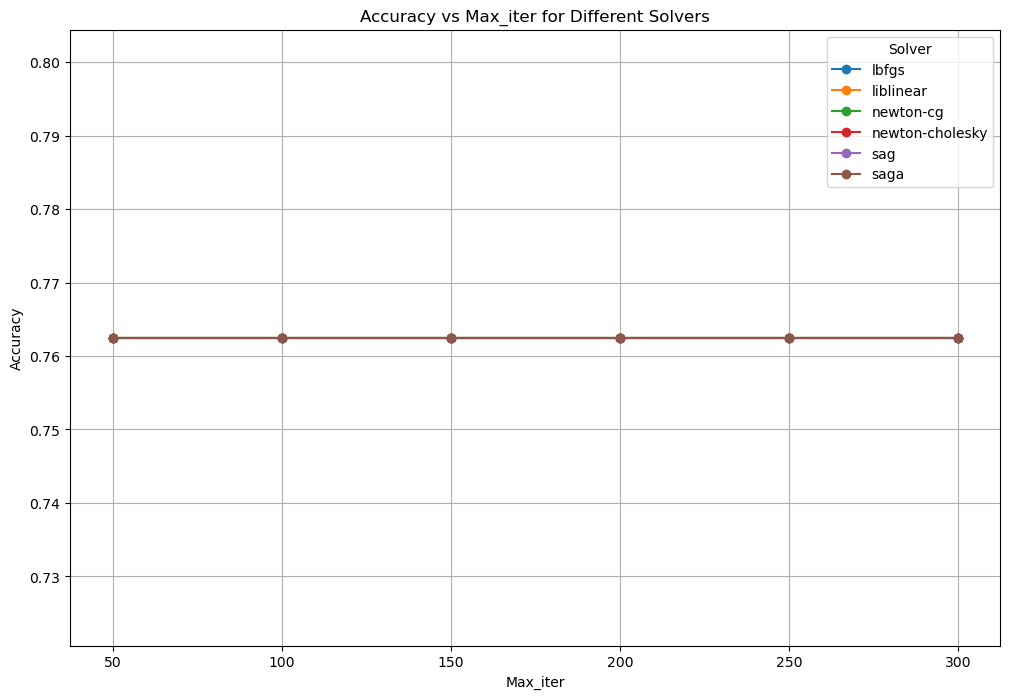

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define solvers and max_iter values
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
max_iters = [50, 100, 150, 200, 250, 300]

# Initialize a dictionary to store accuracies for each solver and max_iter combination
results = {solver: [] for solver in solvers}

# Loop over each solver and each max_iter value
for solver in solvers:
    for max_iter in max_iters:
        try:
            # Initialize and fit the logistic regression model
            model = LogisticRegression(solver=solver, max_iter=max_iter, random_state=42)
            model.fit(X_train, y_train)
            
            # Predict on the validation set and calculate accuracy
            y_val_pred = model.predict(X_val)
            accuracy = accuracy_score(y_val, y_val_pred)
            results[solver].append(accuracy)
            
        except Exception as e:
            # In case a solver fails to converge, record NaN and print a warning
            print(f"Solver '{solver}' with max_iter {max_iter} failed: {e}")
            results[solver].append(None)

# Plotting the learning curves
plt.figure(figsize=(12, 8))

for solver, accuracies in results.items():
    plt.plot(max_iters, accuracies, marker='o', label=solver)

plt.title("Accuracy vs Max_iter for Different Solvers")
plt.xlabel("Max_iter")
plt.ylabel("Accuracy")
plt.legend(title="Solver")
plt.grid(True)
plt.show()


In [57]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


# Define the feature set and target variable for InjuryType
features = [
    'Age', 'responsetime', 'TotalPatientsInEmergency',
    'Gender_Female', 'Gender_Male', 
    'Cause_Carelessness', 'Cause_One Wheeling', 'Cause_Others',
    'Cause_Over Speed', 'Cause_Tyre Burst', 'Cause_U Turn', 'Cause_Wrong Turn',
    'BusesInvolved', 'CarsInvolved', 'RickshawsInvolved',
    'BicycleInvovled', 'VansInvolved', 'BikesInvolved'
]

# Prepare the training and validation data
X_train = standardized_train_df[features]
y_train = standardized_train_df['PatientStatus']
X_val = standardized_valid_df[features]
y_val = standardized_valid_df['PatientStatus']

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)  

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = log_reg.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)

print("Accuracy on Validation Set:", accuracy)


Accuracy on Validation Set: 0.617060447990181


In [58]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Prepare the test data
X_test = standardized_test_df[features]  # Ensure to use the same features as the training set
y_test = standardized_test_df['PatientStatus']  # Target variable for test set

# Make predictions on the test set
y_test_pred = log_reg.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')  # Use 'macro' or 'micro' as needed
recall = recall_score(y_test, y_test_pred, average='weighted')  # Use 'macro' or 'micro' as needed
f1 = f1_score(y_test, y_test_pred, average='weighted')  # Use 'macro' or 'micro' as needed

# Display the results
print("Performance Metrics on Test Set:")
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Performance Metrics on Test Set:
Accuracy: 0.626253277803486
Confusion Matrix:
 [[2198  980    0]
 [1373 1862    0]
 [  22   48    0]]
Precision: 0.6213799285799168
Recall: 0.626253277803486
F1 Score: 0.621650906032302


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max

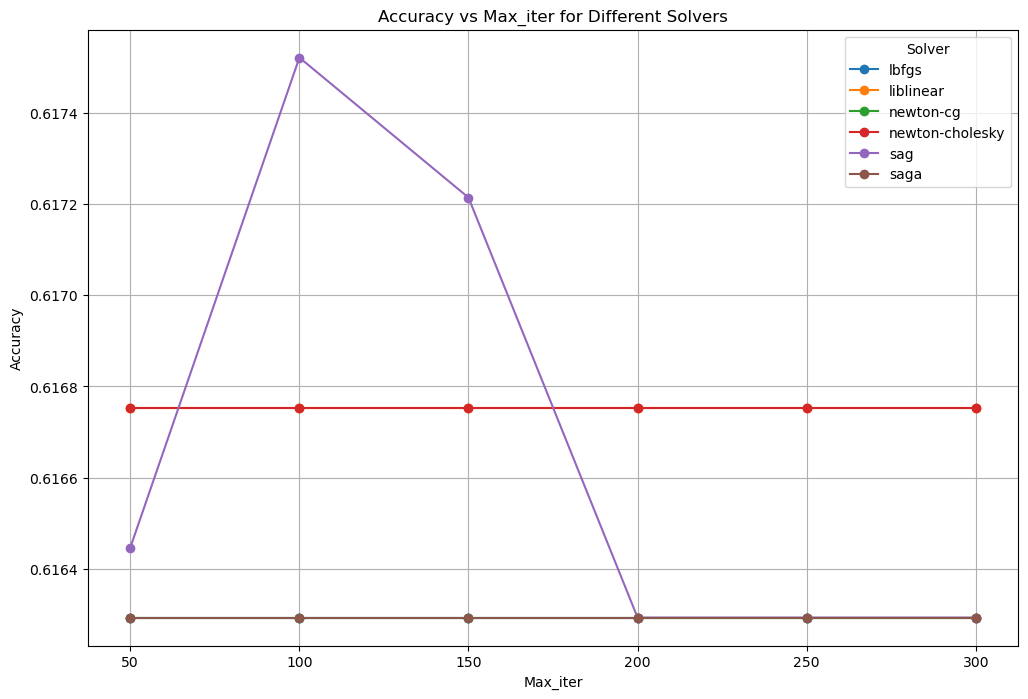

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt



# Define solvers and max_iter values
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
max_iters = [50, 100, 150, 200, 250, 300]

# Initialize a dictionary to store accuracies
results = {solver: [] for solver in solvers}

for solver in solvers:
    for max_iter in max_iters:
        try:
            # Initialize and fit the model
            model = LogisticRegression(solver=solver, max_iter=max_iter, random_state=42)
            model.fit(X_train_scaled, y_train)

            # Predict on validation set and calculate accuracy
            y_val_pred = model.predict(X_val_scaled)
            accuracy = accuracy_score(y_val, y_val_pred)
            results[solver].append(accuracy)
        
        except Exception as e:
            print(f"Solver '{solver}' with max_iter {max_iter} failed: {e}")
            results[solver].append(None)

# Plot the learning curves
plt.figure(figsize=(12, 8))
for solver, accuracies in results.items():
    plt.plot(max_iters, accuracies, marker='o', label=solver)

plt.title("Accuracy vs Max_iter for Different Solvers")
plt.xlabel("Max_iter")
plt.ylabel("Accuracy")
plt.legend(title="Solver")
plt.grid(True)
plt.show()
